<h1>The Worlds Economy Affecting Job stability in Singapore.</h1>
<h3>ST1510 Programming for Data Analytics</h3>
<h2>By: Rejey Ezekiel Jeyakuamar</h2>
<hr>
<h3>Problem Statement</h3>
To what extent does the worlds economy affect/influence Singapores job markets?
<hr>
<h5>Ref:</h5>
<li>https://www.swissre.com/institute/research/sonar/sonar2023/debt-distress-rising-interest-rates.html</li>
<li>https://www.imf.org/external/datamapper/NGDP_RPCH@WEO/OEMDC/ADVEC/WEOWORLD</li>
<li>https://www.worldbank.org/en/research/brief/inflation-database</li>
<li>https://beta.data.gov.sg/collections/415/view</li>
<h5>Datasets:</h5>
<ul>
<li>MEDIAN GROSS MONTHLY INCOME FROM WORK OF RESIDENT EMPLOYEES AGED FIFTEEN YEARS AND OVER BY NATURE OF EMPLOYMENT, TYPE OF EMPLOYMENT AND SEX, JUNE 2022 (df_Employment_Rate_SG) (https://stats.mom.gov.sg/iMAS_Tables1/Time-Series-Table/LFR2022_T17_35.xlsx)
</li>
<li>The World Bank’s Prospects Group has constructed a global database of inflation. The database covers up to 209 countries over the period 1970-2022, and includes six measures of inflation in three frequencies (df_world_infaltion_dataset) (https://stats.mom.gov.sg/iMAS_Tables1/Time-Series-Table/LFR2022_T17_35.xlsx)
</li>
<li>GDP of available countries (df_country_GDP) (https://stats.mom.gov.sg/iMAS_Tables1/Time-Series-Table/LFR2022_T17_35.xlsx)
</li>
<li>Statistics of unniversity graduates (df_UNI_Graduates) (https://stats.mom.gov.sg/iMAS_Tables1/Time-Series-Table/LFR2022_T17_35.xlsx)
</li>
</ul>

In [1579]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import plotly.graph_objects as go
import seaborn as sns

In [1580]:
df_Employment_Rate_SG = pd.read_excel("./Dataset/LFR2022_T17_35.xlsx", sheet_name="T17", skiprows=6)
df_world_infaltion_dataset = pd.read_excel("Dataset\Inflation-data.xlsx", sheet_name="hcpi_m")
df_country_GDP = pd.read_csv("./Dataset/imf-dm-export-20240203.csv", sep=',', encoding='latin-1')
df_UNI_Graduates = pd.read_csv("./Dataset/GraduateEmploymentSurveyNTUNUSSITSMUSUSSSUTD.csv")

Function to see information about the datasets.

In [1581]:
def Information(df):
    print("*" * 50)
    print(f'Columns: {df.columns}')
    print("*" * 50)
    print(f'Null Values: {df.isnull().sum()}\n')
    print("*" * 50)
    print(f'Null values (Columns): {df.isnull().sum(axis=1)}')
    print("*" * 50)
    print(f'Null values (Columns): {df.describe()}')
    print("*" * 50)
    print(f'Null values (Columns): {df.info()}')

In [1582]:
Information(df_Employment_Rate_SG)

**************************************************
Columns: Index(['Unnamed: 0', 'Unnamed: 1',         2012,         2013,         2014,
               2015,         2016,         2017,         2018,         2019,
               2020,         2021,         2022],
      dtype='object')
**************************************************
Null Values: Unnamed: 0    54
Unnamed: 1     3
2012           3
2013           3
2014           3
2015           3
2016           3
2017           3
2018           3
2019           3
2020           3
2021           3
2022           3
dtype: int64

**************************************************
Null values (Columns): 0      0
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13    13
14     1
15     1
16     1
17     1
18     1
19     0
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
30     1
31     1
32    13
33     1
34     1
35     1
36     1
37     1

In [1583]:
Information(df_country_GDP)

**************************************************
Columns: Index(['Real GDP growth (Annual percent change)', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021', '2022', '2023', '2024', '2025', '2026', '2027',
       '2028'],
      dtype='object')
**************************************************
Null Values: Real GDP growth (Annual percent change)    2
1980                                       3
1981                                       3
1982                                       3
1983                                       3
1984                                       3
1985                                       3
1986                                       3
1987     

In [1584]:
Information(df_UNI_Graduates)

**************************************************
Columns: Index(['year', 'university', 'school', 'degree', 'employment_rate_overall',
       'employment_rate_ft_perm', 'basic_monthly_mean', 'basic_monthly_median',
       'gross_monthly_mean', 'gross_monthly_median',
       'gross_mthly_25_percentile', 'gross_mthly_75_percentile'],
      dtype='object')
**************************************************
Null Values: year                         0
university                   0
school                       0
degree                       0
employment_rate_overall      0
employment_rate_ft_perm      0
basic_monthly_mean           0
basic_monthly_median         0
gross_monthly_mean           0
gross_monthly_median         0
gross_mthly_25_percentile    0
gross_mthly_75_percentile    0
dtype: int64

**************************************************
Null values (Columns): 0       0
1       0
2       0
3       0
4       0
       ..
1116    0
1117    0
1118    0
1119    0
1120    0
Length: 1

In [1585]:
Information(df_world_infaltion_dataset)

**************************************************
Columns: Index([    'Country Code', 'IMF Country Code',          'Country',
         'Indicator Type',      'Series Name',             197001,
                   197002,             197003,             197004,
                   197005,
       ...
                   202210,             202211,             202212,
                   202301,             202302,             202303,
           'Unnamed: 644',      'Data source',        'Base date',
                   'Note'],
      dtype='object', length=648)
**************************************************
Null Values: Country Code          1
IMF Country Code      2
Country               2
Indicator Type        2
Series Name           2
                   ... 
202303              107
Unnamed: 644        188
Data source           2
Base date             2
Note                185
Length: 648, dtype: int64

**************************************************
Null values (Columns): 0      23

<h2>Dataset 1 (df_Employment_Rate_SG)</h2>
This dataset encapsulates the employment rates in singapore and segregates them into subsections but i will be mainly looking at the total (overall),total (male) and total (female).

In [1586]:
df_Employment_Rate_SG

,Unnamed: 0,Unnamed: 1,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Total,Total,64.1,64.1,64.5,65.7,65.3,64.9,65.1,65.2,64.5,67.2,67.5
1,NaN,15 - 19,11.3,10.9,11.4,14.5,14.1,13.2,14.2,13.6,12.1,14.7,14.8
2,NaN,20 - 24,58.0,55.7,56.2,59.0,56.5,54.9,55.1,53.8,47.9,55.7,52.2
3,NaN,25 - 29,84.2,83.7,83.8,85.5,85.5,85.4,85.0,84.7,84.2,85.0,84.4
4,NaN,30 - 34,87.3,87.3,87.0,87.5,88.0,89.5,88.2,89.5,89.1,89.8,90.7
5,NaN,35 - 39,85.6,85.1,86.2,87.2,86.5,86.9,86.5,87.3,86.8,88.2,89.1
6,NaN,40 - 44,83.1,83.2,84.2,85.2,85.5,84.7,86.5,86.0,85.8,86.8,87.8
7,NaN,45 - 49,81.9,81.9,82.3,83.3,83.3,84.2,83.5,84.7,83.7,83.5,86.1
8,NaN,50 - 54,77.0,77.8,80.0,80.1,78.8,79.4,79.3,79.2,78.3,81.7,81.5
9,NaN,55 - 59,70.3,71.0,72.2,73.1,73.0,72.1,72.7,72.1,72.4,74.7,75.5


In [1587]:
df_Employment_Rate_SG.drop('Unnamed: 0',axis='columns', inplace=True)

df_Employment_Rate_SG.rename(columns={"Unnamed: 1":"Age Range"}, inplace=True)

def create_new_dataframe(df, start, end, name):
    return df.iloc[start:end + 1, :].copy()

# Define the row ranges for each new DataFrame
df_lengths = [[0, 18], [19, 37], [38, df_Employment_Rate_SG.shape[0] - 1]]

# Define names for the new DataFrames
names = ['df_Total', 'df_Male', 'df_Female']

# Create a dictionary to store the new DataFrames
dfs = {}

# Loop through the names and row ranges, and create new DataFrames
for name, (start, end) in zip(names, df_lengths):
    dfs[name] = create_new_dataframe(df_Employment_Rate_SG, start, end, name)

# Now you can access the new DataFrames using the specified names
df_Total = dfs['df_Total']
df_Male = dfs['df_Male']
df_Female = dfs['df_Female']

df_Total.drop(13,axis=0,inplace=True)
df_Female.drop(51,axis=0,inplace=True)
df_Male.drop(32,axis=0,inplace=True)

df_Female.iloc[0:1, 0] = 'Total (Female)'
df_Male.iloc[0:1, 0] = 'Total (Male)'
df_Total.iloc[0:1, 0] = 'Total (Overall)'

In [1588]:
df_Total.head(2)

,Age Range,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Total (Overall),64.1,64.1,64.5,65.7,65.3,64.9,65.1,65.2,64.5,67.2,67.5
1,15 - 19,11.3,10.9,11.4,14.5,14.1,13.2,14.2,13.6,12.1,14.7,14.8


In [1589]:
df_Male.head(2)

,Age Range,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
19,Total (Male),73.4,73.2,73.3,73.9,73.3,73.0,72.8,72.4,71.7,73.8,74.4
20,15 - 19,13.0,12.6,14.2,17.4,17.4,17.4,17.9,16.5,15.9,16.9,18.8


In [1590]:
df_Female.head(2)

,Age Range,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
38,Total (Female),55.3,55.6,56.2,58.0,57.7,57.2,57.8,58.3,57.7,61.0,60.9
39,15 - 19,9.4,8.9,8.4,11.4,10.6,8.7,10.1,10.4,7.9,12.4,10.8


In [1591]:
df_collactive = pd.concat([df_Total, df_Male, df_Female], axis=0)
df_collactive.head(2)

,Age Range,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Total (Overall),64.1,64.1,64.5,65.7,65.3,64.9,65.1,65.2,64.5,67.2,67.5
1,15 - 19,11.3,10.9,11.4,14.5,14.1,13.2,14.2,13.6,12.1,14.7,14.8


In [1592]:
df_collactive_important = df_collactive.loc[[0, 19, 38]]
df = df_collactive_important

In [1593]:
df_overall = df[df['Age Range'] == 'Total (Overall)'].set_index('Age Range').transpose().reset_index().rename(columns={'index': 'Year'})
df_male = df[df['Age Range'] == 'Total (Male)'].set_index('Age Range').transpose().reset_index().rename(columns={'index': 'Year'})
df_female = df[df['Age Range'] == 'Total (Female)'].set_index('Age Range').transpose().reset_index().rename(columns={'index': 'Year'})

# Merge the DataFrames on the 'Year' column
df_Employment = pd.merge(df_overall, df_male, on='Year', suffixes=('_Overall', '_Male'))
df_Employment = pd.merge(df_Employment, df_female, on='Year')
df_Employment


Age Range,Year,Total (Overall),Total (Male),Total (Female)
0,2012,64.1,73.4,55.3
1,2013,64.1,73.2,55.6
2,2014,64.5,73.3,56.2
3,2015,65.7,73.9,58.0
4,2016,65.3,73.3,57.7
5,2017,64.9,73.0,57.2
6,2018,65.1,72.8,57.8
7,2019,65.2,72.4,58.3
8,2020,64.5,71.7,57.7
9,2021,67.2,73.8,61.0


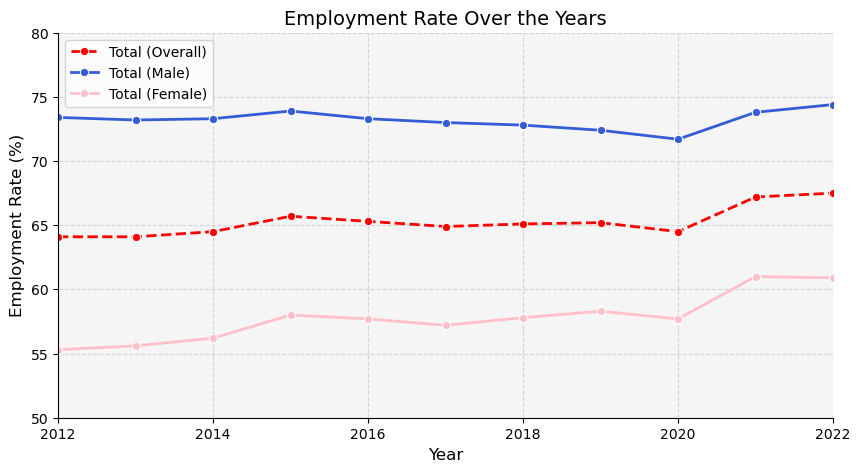

In [1594]:

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 5))

# Plotting lines
sns.lineplot(x='Year', y='Total (Overall)', data=df_Employment, marker='o', label='Total (Overall)', color='red', linestyle='--', linewidth=2)
sns.lineplot(x='Year', y='Total (Male)', data=df_Employment, marker='o', label='Total (Male)', color='#355CD7', linewidth=2)
sns.lineplot(x='Year', y='Total (Female)', data=df_Employment, marker='o', label='Total (Female)', color='pink', linewidth=2)

# Adding labels and title
plt.xlabel('Year', fontsize=12)
plt.ylabel('Employment Rate (%)', fontsize=12)
plt.title('Employment Rate Over the Years', fontsize=14)

# Setting axis ranges
plt.xlim(2012, 2022)
plt.ylim(50, 80)

# Adding legend
plt.legend(loc='upper left', fontsize=10)

# Remove spines
sns.despine()

# Adding gridlines
ax.grid(color='lightgray', linestyle='--')

# Adding a background color
ax.set_facecolor('#F5F5F5')

# Displaying the plot
plt.show()


<h2>Dataset 2 (Countries GDP)</h2>

In [1595]:
df_Countries_GDP = df_country_GDP.drop([0,229,230]) # Removing Header and Footer.
df_Countries_GDP.rename(columns={'Real GDP growth (Annual percent change)':'country'}, inplace=True) # Renaming the long column name to country.
df_Countries_GDP.replace("no data", np.nan, inplace=True)
df_Countries_GDP

,country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.9,-2.4,-20.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,2.7,5.7,2.9,1.1,2,-1.5,5.6,-0.8,-1.4,...,2.1,-3.3,8.9,4.8,3.6,3.3,3.4,3.5,3.5,3.5
3,Algeria,-5.4,3,6.4,5.4,5.6,5.6,-0.2,-0.7,-1.9,...,1,-5.1,3.4,3.2,3.8,3.1,2.5,1.9,1.7,1.7
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,-11.2,8.3,8.8,2.1,1.5,1.5,1.5,1.5,1.5
5,Angola,2.4,-4.4,0,4.2,6,3.5,2.9,4.1,6.1,...,-0.7,-5.6,1.2,3,1.3,3.3,3.4,3.5,3.5,3.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,Major advanced economies (G7),0.9,2,-0.1,3.3,5,3.8,3,3.5,4.7,...,1.6,-4.5,5.4,2.3,1.5,1.2,1.7,1.8,1.7,1.6
225,Middle East and Central Asia,-1.3,0.4,0.4,0.7,0.2,1.2,2,-0.1,3.3,...,1.6,-2.6,4.3,5.6,2,3.4,3.9,3.6,3.8,3.7
226,Other advanced economies,3.8,4.2,2.1,4,6.6,4.3,5.5,6.5,5.5,...,2,-1.6,5.7,2.6,1.8,2.2,2.3,2.3,2.2,2.2
227,Sub-Saharan Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.2,-1.6,4.7,4,3.3,4,4.1,4.1,4.2,4.3


In [1596]:
df_Countries_GDP.drop(df_Countries_GDP.loc[:, '2024':'2028'].columns, axis = 1, inplace=True) # Removing the predicted values which came with the dataset.
df_sub_labels = df_Countries_GDP.loc[197:229] # Removing Sub lables (ASIAN, EUROPE, ETC..)

In [1597]:
def Missing_Data(df,year):
    no_data_countries = []

    for index, row in df.iterrows():
        country = row['country']
        
        # Add condition to check only for years after 1990
        no_data_count = sum(row[year:] == "no data")

        if no_data_count > 0:
            no_data_countries.append(country)

    return no_data_countries

Countries_to_remove = Missing_Data(df_Countries_GDP,"1990")

df_Countries_GDP = df_Countries_GDP[~df_Countries_GDP['country'].isin(Countries_to_remove)]

# Countries_can_be_saved_using_regression = Missing_Data(df_Countries_GDP,"1990")

# print(f'{len(Countries_can_be_saved_using_regression)} Countries with missing data : {Countries_can_be_saved_using_regression}')

df_Countries_GDP

,country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.7,1,2.2,2.6,1.2,3.9,-2.4,-20.7,NaN,NaN
2,Albania,2.7,5.7,2.9,1.1,2,-1.5,5.6,-0.8,-1.4,...,1.8,2.2,3.3,3.8,4,2.1,-3.3,8.9,4.8,3.6
3,Algeria,-5.4,3,6.4,5.4,5.6,5.6,-0.2,-0.7,-1.9,...,3.8,3.7,3.2,1.4,1.2,1,-5.1,3.4,3.2,3.8
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.5,1.4,3.7,0.3,1.6,2,-11.2,8.3,8.8,2.1
5,Angola,2.4,-4.4,0,4.2,6,3.5,2.9,4.1,6.1,...,4.8,0.9,-2.6,-0.2,-1.3,-0.7,-5.6,1.2,3,1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,Major advanced economies (G7),0.9,2,-0.1,3.3,5,3.8,3,3.5,4.7,...,1.9,2.1,1.5,2.2,2.1,1.6,-4.5,5.4,2.3,1.5
225,Middle East and Central Asia,-1.3,0.4,0.4,0.7,0.2,1.2,2,-0.1,3.3,...,3.3,3,4.3,2.5,2.8,1.6,-2.6,4.3,5.6,2
226,Other advanced economies,3.8,4.2,2.1,4,6.6,4.3,5.5,6.5,5.5,...,3,2.3,2.6,3.1,2.8,2,-1.6,5.7,2.6,1.8
227,Sub-Saharan Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5,3.2,1.5,3,3.3,3.2,-1.6,4.7,4,3.3


Countries with missing data we have to predict using regression.

Pivotting the dataframe

In [1598]:
df_countries_no_transpose = df_Countries_GDP.copy()

Grouped Countries to keep.

In [1599]:
df_Countries_GDP.set_index("country", inplace=True)
df_Countries_GDP = df_Countries_GDP.transpose()
df_Countries_GDP = df_Countries_GDP[df_Countries_GDP.index > "2011"]
df_Countries_GDP = df_Countries_GDP[df_Countries_GDP.index < "2023"]
df_Countries_GDP.reset_index(inplace=True)
df_Countries_GDP.rename(columns={"index": "year", "country": "index"}, inplace=True)
df_Countries_GDP.rename_axis("index", axis="columns", inplace=True)
df_Countries_GDP

index,year,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,...,Emerging and Developing Europe,Emerging market and developing economies,Euro area,European Union,Latin America and the Caribbean,Major advanced economies (G7),Middle East and Central Asia,Other advanced economies,Sub-Saharan Africa,World
0,2012,14,1.4,3.4,-5,8.5,3.4,-1,7.1,-1,...,3.2,5.4,-0.9,-0.6,3,1.4,4.8,2.2,4.8,3.5
1,2013,5.7,1,2.8,-3.5,5,-0.6,2.4,3.4,6.4,...,2.9,5,-0.2,-0.1,2.8,1.4,3,2.5,4.9,3.4
2,2014,2.7,1.8,3.8,2.5,4.8,3.8,-2.5,3.6,0,...,1.9,4.7,1.4,1.7,1.3,1.9,3.3,3,5,3.5
3,2015,1,2.2,3.7,1.4,0.9,3.8,2.7,3.3,3.6,...,1,4.3,2,2.5,0.3,2.1,3,2.3,3.2,3.4
4,2016,2.2,3.3,3.2,3.7,-2.6,5.5,-2.1,0.2,2.1,...,1.8,4.4,1.9,2,-0.8,1.5,4.3,2.6,1.5,3.2
5,2017,2.6,3.8,1.4,0.3,-0.2,3.1,2.8,7.5,0.7,...,4.2,4.8,2.6,3.1,1.3,2.2,2.5,3.1,3,3.8
6,2018,1.2,4,1.2,1.6,-1.3,6.8,-2.6,5.2,2.4,...,3.6,4.6,1.8,2.3,1.1,2.1,2.8,2.8,3.3,3.6
7,2019,3.9,2.1,1,2,-0.7,4.3,-2,7.6,-2.3,...,2.5,3.6,1.6,2,0.2,1.6,1.6,2,3.2,2.8
8,2020,-2.4,-3.3,-5.1,-11.2,-5.6,-17.5,-9.9,-7.2,-24,...,-1.6,-1.8,-6.1,-5.6,-7,-4.5,-2.6,-1.6,-1.6,-2.8
9,2021,-20.7,8.9,3.4,8.3,1.2,6.6,10.7,5.7,27.6,...,7.3,6.9,5.6,5.9,7.3,5.4,4.3,5.7,4.7,6.3


In [1600]:
filtered_countries = df_Countries_GDP.filter(like='Region')
filtered_countries[['World','Singapore','year']] = df_Countries_GDP[['World','Singapore','year']]
filtered_countries

C:\Users\user\AppData\Local\Temp\ipykernel_15664\691593961.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_countries[['World','Singapore','year']] = df_Countries_GDP[['World','Singapore','year']]
C:\Users\user\AppData\Local\Temp\ipykernel_15664\691593961.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_countries[['World','Singapore','year']] = df_Countries_GDP[['World','Singapore','year']]
C:\Users\user\AppData\Local\Temp\ipykernel_15664\691593961.py:2: SettingWithCopyWarning: 
A va

index,Africa (Region),Middle East (Region),Sub-Saharan Africa (Region),Western Hemisphere (Region),World,Singapore,year
0,6.2,3.4,3.9,2.5,3.5,4.4,2012
1,3.7,2.9,4.8,2.2,3.4,4.8,2013
2,3.7,3.7,4.9,2,3.5,3.9,2014
3,3.4,2.5,3.3,1.8,3.4,3,2015
4,2.2,5.4,1.7,0.8,3.2,3.6,2016
5,3.8,0.6,2.9,2,3.8,4.5,2017
6,3.4,1.5,3,2.4,3.6,3.6,2018
7,3,0.4,3,1.6,2.8,1.3,2019
8,-1.7,-3.4,-1.7,-4.1,-2.8,-3.9,2020
9,4.8,3.9,4.5,6.3,6.3,8.9,2021


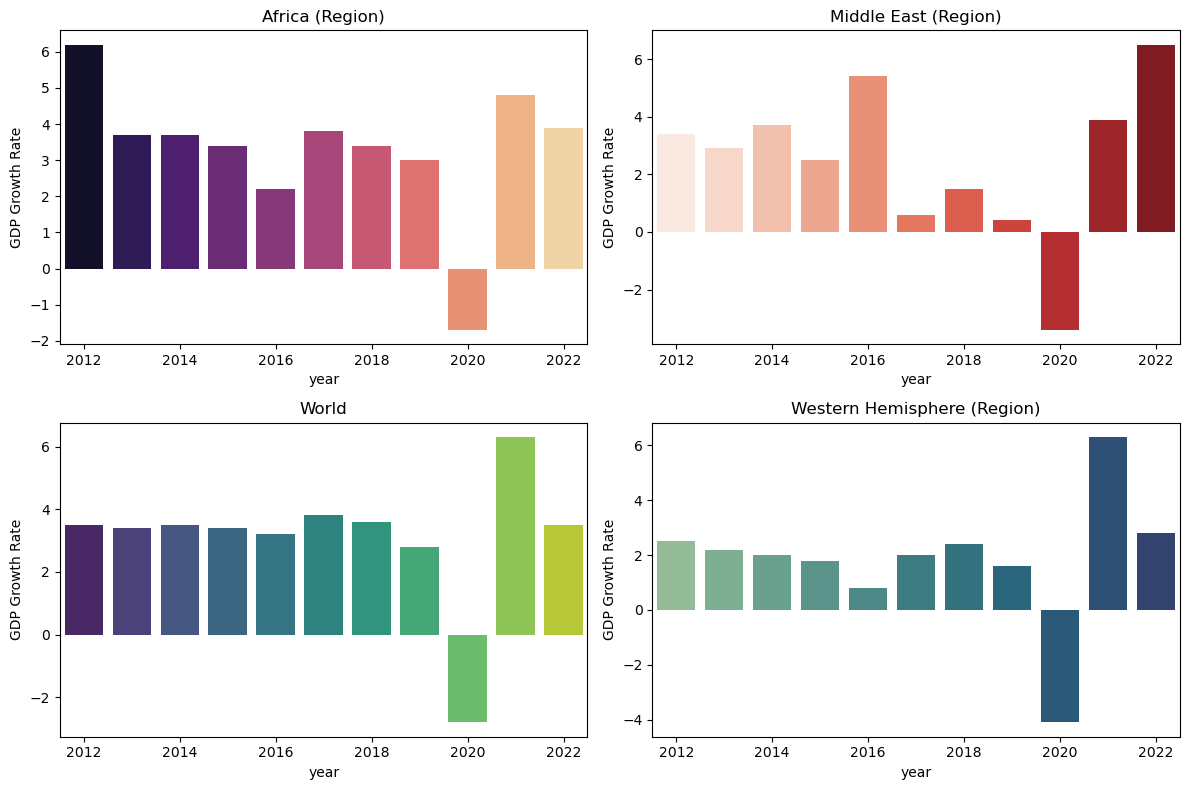

In [1601]:
# Assuming df is your DataFrame and it has columns 'category', 'sub_category' and 'value'
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot 1
sns.barplot(x=filtered_countries["year"], y=(filtered_countries['Africa (Region)'].astype(float)), data=filtered_countries, palette="magma", ax=axes[0, 0])
axes[0, 0].set_title('Africa (Region)')
axes[0, 0].set_ylabel('GDP Growth Rate')
axes[0, 0].set_xticks(np.arange(0, len(filtered_countries["year"]), 2))
axes[0, 0].set_xticklabels(filtered_countries["year"][::2])

# Plot 2
# Add your code for the second plot here
sns.barplot(x=filtered_countries["year"], y=(filtered_countries['Middle East (Region)'].astype(float)), data=filtered_countries, palette="Reds", ax=axes[0, 1])
axes[0, 1].set_title('Middle East (Region)')
axes[0, 1].set_ylabel('GDP Growth Rate')
axes[0, 1].set_xticks(np.arange(0, len(filtered_countries["year"]), 2))
axes[0, 1].set_xticklabels(filtered_countries["year"][::2])

# Plot 3
# Add your code for the third plot here
sns.barplot(x=filtered_countries["year"], y=(filtered_countries['World'].astype(float)), data=filtered_countries, palette="viridis", ax=axes[1, 0])
axes[1, 0].set_title('World')
axes[1, 0].set_ylabel('GDP Growth Rate')
axes[1, 0].set_xticks(np.arange(0, len(filtered_countries["year"]), 2))
axes[1, 0].set_xticklabels(filtered_countries["year"][::2])

# Plot 4
# Add your code for the fourth plot here
sns.barplot(x=filtered_countries["year"], y=(filtered_countries['Western Hemisphere (Region)'].astype(float)), data=filtered_countries, palette="crest", ax=axes[1, 1])
axes[1, 1].set_title('Western Hemisphere (Region)')
axes[1, 1].set_ylabel('GDP Growth Rate')
axes[1, 1].set_xticks(np.arange(0, len(filtered_countries["year"]), 2))
axes[1, 1].set_xticklabels(filtered_countries["year"][::2])


plt.tight_layout()
plt.show()


In [1602]:
df_Employment = df_Employment.rename(columns={'Year': 'year'})
df_Employment

Age Range,year,Total (Overall),Total (Male),Total (Female)
0,2012,64.1,73.4,55.3
1,2013,64.1,73.2,55.6
2,2014,64.5,73.3,56.2
3,2015,65.7,73.9,58.0
4,2016,65.3,73.3,57.7
5,2017,64.9,73.0,57.2
6,2018,65.1,72.8,57.8
7,2019,65.2,72.4,58.3
8,2020,64.5,71.7,57.7
9,2021,67.2,73.8,61.0


In [1603]:
df_merged = pd.concat([df_Employment, filtered_countries], axis=1)
df_merged = df_merged.iloc[:, :-1]
df_merged = df_merged.drop(columns=['Total (Male)','Total (Female)'])
df_merged


,year,Total (Overall),Africa (Region),Middle East (Region),Sub-Saharan Africa (Region),Western Hemisphere (Region),World,Singapore
0,2012,64.1,6.2,3.4,3.9,2.5,3.5,4.4
1,2013,64.1,3.7,2.9,4.8,2.2,3.4,4.8
2,2014,64.5,3.7,3.7,4.9,2,3.5,3.9
3,2015,65.7,3.4,2.5,3.3,1.8,3.4,3
4,2016,65.3,2.2,5.4,1.7,0.8,3.2,3.6
5,2017,64.9,3.8,0.6,2.9,2,3.8,4.5
6,2018,65.1,3.4,1.5,3,2.4,3.6,3.6
7,2019,65.2,3,0.4,3,1.6,2.8,1.3
8,2020,64.5,-1.7,-3.4,-1.7,-4.1,-2.8,-3.9
9,2021,67.2,4.8,3.9,4.5,6.3,6.3,8.9


In [1604]:
df_merged.info()
df_merged = df_merged.astype(float)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          11 non-null     int64  
 1   Total (Overall)               11 non-null     float64
 2   Africa (Region)               11 non-null     object 
 3   Middle East (Region)          11 non-null     object 
 4   Sub-Saharan Africa (Region)   11 non-null     object 
 5   Western Hemisphere (Region)   11 non-null     object 
 6   World                         11 non-null     object 
 7   Singapore                     11 non-null     object 
dtypes: float64(1), int64(1), object(6)
memory usage: 836.0+ bytes


In [1605]:
df_merged

,year,Total (Overall),Africa (Region),Middle East (Region),Sub-Saharan Africa (Region),Western Hemisphere (Region),World,Singapore
0,2012.0,64.1,6.2,3.4,3.9,2.5,3.5,4.4
1,2013.0,64.1,3.7,2.9,4.8,2.2,3.4,4.8
2,2014.0,64.5,3.7,3.7,4.9,2.0,3.5,3.9
3,2015.0,65.7,3.4,2.5,3.3,1.8,3.4,3.0
4,2016.0,65.3,2.2,5.4,1.7,0.8,3.2,3.6
5,2017.0,64.9,3.8,0.6,2.9,2.0,3.8,4.5
6,2018.0,65.1,3.4,1.5,3.0,2.4,3.6,3.6
7,2019.0,65.2,3.0,0.4,3.0,1.6,2.8,1.3
8,2020.0,64.5,-1.7,-3.4,-1.7,-4.1,-2.8,-3.9
9,2021.0,67.2,4.8,3.9,4.5,6.3,6.3,8.9


In [1606]:
df_merged.rename(columns={'Total (Overall)':'Total_Overall'},inplace=True)

In [1607]:
df_merged.columns = df_merged.columns.str.replace('(Region)', '')
df_merged.columns = df_merged.columns.str.replace(' ', '_')
df_merged.rename(columns={'Sub-Saharan_Africa__':'SS_Africa'},inplace=True)
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 11 non-null     float64
 1   Total_Overall        11 non-null     float64
 2   Africa_              11 non-null     float64
 3   Middle_East_         11 non-null     float64
 4   SS_Africa            11 non-null     float64
 5   Western_Hemisphere_  11 non-null     float64
 6   World                11 non-null     float64
 7   Singapore            11 non-null     float64
dtypes: float64(8)
memory usage: 836.0 bytes


In [1608]:
model_employment_rate_regression = smf.ols("Total_Overall ~ World + Singapore + Africa_ + Middle_East_ + Western_Hemisphere_ + SS_Africa", data=df_merged).fit()
model_employment_rate_regression.summary()

c:\Users\user\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Total_Overall   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     4.825
Date:                Mon, 05 Feb 2024   Prob (F-statistic):             0.0748
Time:                        23:50:25   Log-Likelihood:                -4.9193
No. Observations:                  11   AIC:                             23.84
Df Residuals:                       4   BIC:                             26.62
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              67.0894      0.712     94.173      0.000      65.111      69.067
World                  -0.2363      0.471     -0.501      0.642      -1.545       1.072
Singapore              -0.4450      0.252     -1.769      0.152      -1.143       0.253
Africa_                -0.4077      0.241     -1.691      0.166      -1.077       0.262
Middle_East_            0.2860      0.108      2.652      0.057      -0.013       0.585
Western_Hemisphere_     1.3477      0.371      3.628      0.022       0.316       2.379
SS_Africa              -0.4509      0.252     -1.786      0.149      -1.152       0.250
==============================================================================
Omnibus:                        1.622   Durbin-Watson:                   2.620
Prob(Omnibus):                  0.444   Jarque-Bera (JB):                1.162
Skew:                           0.621   Prob(JB):                        0.559
Kurtosis:                       2.004   Cond. No.                         39.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

[64.35919453 64.2710852  64.56212849 65.21729635 65.69001298 64.19865037
 65.56090279 65.54384906 64.44848319 67.2593911  66.98900595]
R-Value: 0.94, Showing High Positive Correlation


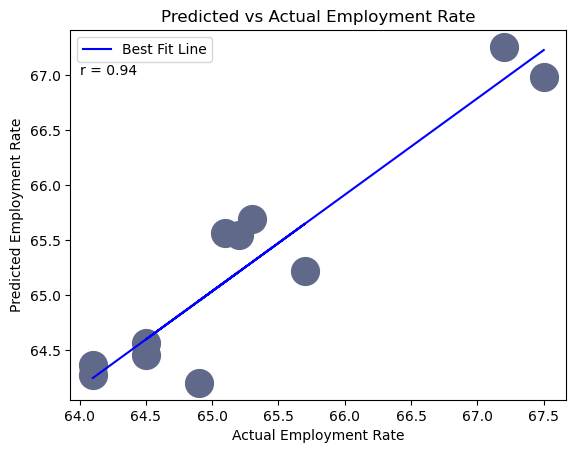

In [1609]:
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt

# Get the predicted values
predicted_values = model_employment_rate_regression.predict()
print(predicted_values)
# # Calculate the line of best fit
slope, intercept, r_value, p_value, std_err = linregress(df_merged['Total_Overall'], predicted_values)
line_of_best_fit = slope * df_merged['Total_Overall'] + intercept

# Plot the scatter plot
plt.scatter(df_merged['Total_Overall'], predicted_values,s=400,color='#60698A')
plt.plot(df_merged['Total_Overall'], line_of_best_fit, color='blue', label='Best Fit Line')
plt.xlabel('Actual Employment Rate')
plt.ylabel('Predicted Employment Rate')
plt.title('Predicted vs Actual Employment Rate')
plt.legend()

# Add the r value as a label
plt.text(0.02, 0.88, f'r = {r_value:.2f}', transform=plt.gca().transAxes)

print(f'R-Value: {r_value:.2f}, Showing High Positive Correlation')

# Plot figure
plt.show()

<h2>Dataset 3 (Inflation Dataset WorldWide)</h2>

In [1610]:
df_world_infaltion_dataset # Headline Consumer Price Index

,Country Code,IMF Country Code,Country,Indicator Type,Series Name,197001,197002,197003,197004,197005,...,202210,202211,202212,202301,202302,202303,Unnamed: 644,Data source,Base date,Note
0,ABW,314.0,Aruba,Index,Headline Consumer Price Index,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IFS,2010,NaN
1,AFG,512.0,Afghanistan,Index,Headline Consumer Price Index,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IFS,2010,NaN
2,AGO,614.0,Angola,Index,Headline Consumer Price Index,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,National sources,2010,NaN
3,ALB,914.0,Albania,Index,Headline Consumer Price Index,NaN,NaN,NaN,NaN,NaN,...,134.021706,133.675088,134.246950,135.725578,137.237081,138.197583,NaN,IFS,2010,NaN
4,ARE,466.0,United Arab Emirates,Index,Headline Consumer Price Index,NaN,NaN,NaN,NaN,NaN,...,117.959276,118.486281,118.814147,NaN,NaN,NaN,NaN,IFS,2010,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,ZAF,199.0,South Africa,Index,Headline Consumer Price Index,1.7,1.7,1.7,1.8,1.8,...,144.100000,144.600000,145.156000,145.021000,146.101000,147.586000,NaN,OECDstat,2015,NaN
184,ZMB,754.0,Zambia,Index,Headline Consumer Price Index,NaN,NaN,NaN,NaN,NaN,...,336.732147,339.070950,341.668593,NaN,NaN,NaN,NaN,IFS,2010,NaN
185,ZWE,698.0,Zimbabwe,Index,Headline Consumer Price Index,NaN,NaN,NaN,NaN,NaN,...,14092.920623,14285.730303,14465.965440,NaN,NaN,NaN,NaN,IFS,2010,NaN
186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1611]:
df_world_infaltion_dataset = df_world_infaltion_dataset.loc[:185] 

In [1612]:
df_world_infaltion_dataset = df_world_infaltion_dataset.drop(columns=['Country Code','IMF Country Code','Indicator Type','Series Name','Data source','Base date','Note','Unnamed: 644'])

In [1613]:
df_world_infaltion_dataset


,Country,197001,197002,197003,197004,197005,197006,197007,197008,197009,...,202206,202207,202208,202209,202210,202211,202212,202301,202302,202303
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,707.591132,713.341401,718.783620,724.482547,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,131.379352,131.669628,132.725290,133.536313,134.021706,133.675088,134.246950,135.725578,137.237081,138.197583
4,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,117.959276,118.486281,118.814147,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,137.660100,138.880014,139.178856,138.927915,140.242848,140.625728,141.855985,143.150544,NaN,NaN
182,"Yemen, Rep.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,South Africa,1.7,1.7,1.7,1.8,1.8,1.8,1.8,1.8,1.8,...,140.800000,143.100000,143.500000,143.700000,144.100000,144.600000,145.156000,145.021000,146.101000,147.586000
184,Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,334.929512,336.408597,337.296048,336.112780,336.732147,339.070950,341.668593,NaN,NaN,NaN


In [1614]:
df_world_infaltion_dataset = df_world_infaltion_dataset[df_world_infaltion_dataset['Country'].isin(['Singapore','United States','China','Russian Federation','Germany','United Kingdom','Korea, Rep.','France','Japan','Israel','India'])]

In [1615]:
df_world_infaltion_dataset.reset_index(inplace=True)

In [1616]:
df_world_infaltion_dataset.drop(columns=['index'], inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_15664\4015125889.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_world_infaltion_dataset.drop(columns=['index'], inplace=True)


In [1617]:
df_world_infaltion_dataset

,Country,197001,197002,197003,197004,197005,197006,197007,197008,197009,...,202206,202207,202208,202209,202210,202211,202212,202301,202302,202303
0,China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,131.652292,132.293247,132.165056,132.54963,132.677821,132.421439,132.293247,133.318777,132.677821,132.293247
1,Germany,29.291800,29.357000,29.487500,29.618000,29.618000,29.683200,29.683200,29.683200,29.683200,...,115.760000,116.287000,116.709000,118.81800,119.661000,119.872000,119.345000,120.505000,121.453000,122.402000
2,France,14.300000,14.400000,14.400000,14.500000,14.500000,14.600000,14.600000,14.700000,14.700000,...,112.500000,112.900000,113.400000,112.70000,113.900000,114.300000,114.160000,114.600000,115.780000,116.790000
3,United Kingdom,8.100000,8.200000,8.200000,8.300000,8.400000,8.400000,8.500000,8.400000,8.500000,...,120.500000,121.200000,121.800000,122.30000,124.300000,124.800000,125.300000,124.800000,126.000000,126.800000
4,India,3.000000,3.000000,3.000000,3.000000,3.100000,3.100000,3.100000,3.100000,3.200000,...,142.300000,143.100000,143.400000,144.70000,146.000000,146.000000,145.763000,146.314000,146.204000,NaN
5,Israel,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,106.800000,108.000000,107.700000,107.90000,108.500000,108.600000,108.887000,109.207000,109.741000,110.168000
6,Japan,30.800000,30.800000,31.200000,31.500000,31.400000,31.400000,31.400000,31.300000,31.800000,...,103.600000,104.100000,104.600000,105.00000,105.600000,105.800000,105.981000,106.592000,105.879000,106.287000
7,"Korea, Rep.",4.637440,4.730640,4.833830,4.937010,4.887750,4.784560,4.819180,4.853130,4.970960,...,114.083000,114.631000,114.505000,114.83100,115.126000,115.010000,115.200000,116.065000,116.360000,116.550000
8,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Singapore,30.837893,30.837893,30.528741,30.837893,30.296877,30.451453,30.837893,30.837893,30.683317,...,124.325912,124.514681,125.689629,126.23420,125.723950,126.943516,127.203217,127.444613,128.156217,128.801466


In [1618]:
df_world_infaltion_dataset.set_index('Country', inplace=True)

In [1619]:
df_world_infaltion_dataset = df_world_infaltion_dataset.T

In [1620]:
# df_world_infaltion_dataset.transpose()
df_world_infaltion_dataset

Country,China,Germany,France,United Kingdom,India,Israel,Japan,"Korea, Rep.",Russian Federation,Singapore,United States
197001,NaN,29.2918,14.3,8.1,3.0,0.0,30.8,4.63744,NaN,30.837893,15.9
197002,NaN,29.357,14.4,8.2,3.0,0.0,30.8,4.73064,NaN,30.837893,16.0
197003,NaN,29.4875,14.4,8.2,3.0,0.0,31.2,4.83383,NaN,30.528741,16.1
197004,NaN,29.618,14.5,8.3,3.0,0.0,31.5,4.93701,NaN,30.837893,16.2
197005,NaN,29.618,14.5,8.4,3.1,0.0,31.4,4.88775,NaN,30.296877,16.3
...,...,...,...,...,...,...,...,...,...,...,...
202211,132.421439,119.872,114.3,124.8,146.0,108.6,105.8,115.01,NaN,126.943516,125.6
202212,132.293247,119.345,114.16,125.3,145.763,108.887,105.981,115.2,NaN,127.203217,125.222
202301,133.318777,120.505,114.6,124.8,146.314,109.207,106.592,116.065,NaN,127.444613,126.223
202302,132.677821,121.453,115.78,126.0,146.204,109.741,105.879,116.36,NaN,128.156217,126.928


In [1621]:
df_world_infaltion_dataset.columns

Index(['China', 'Germany', 'France', 'United Kingdom', 'India', 'Israel',
       'Japan', 'Korea, Rep.', 'Russian Federation', 'Singapore',
       'United States'],
      dtype='object', name='Country')

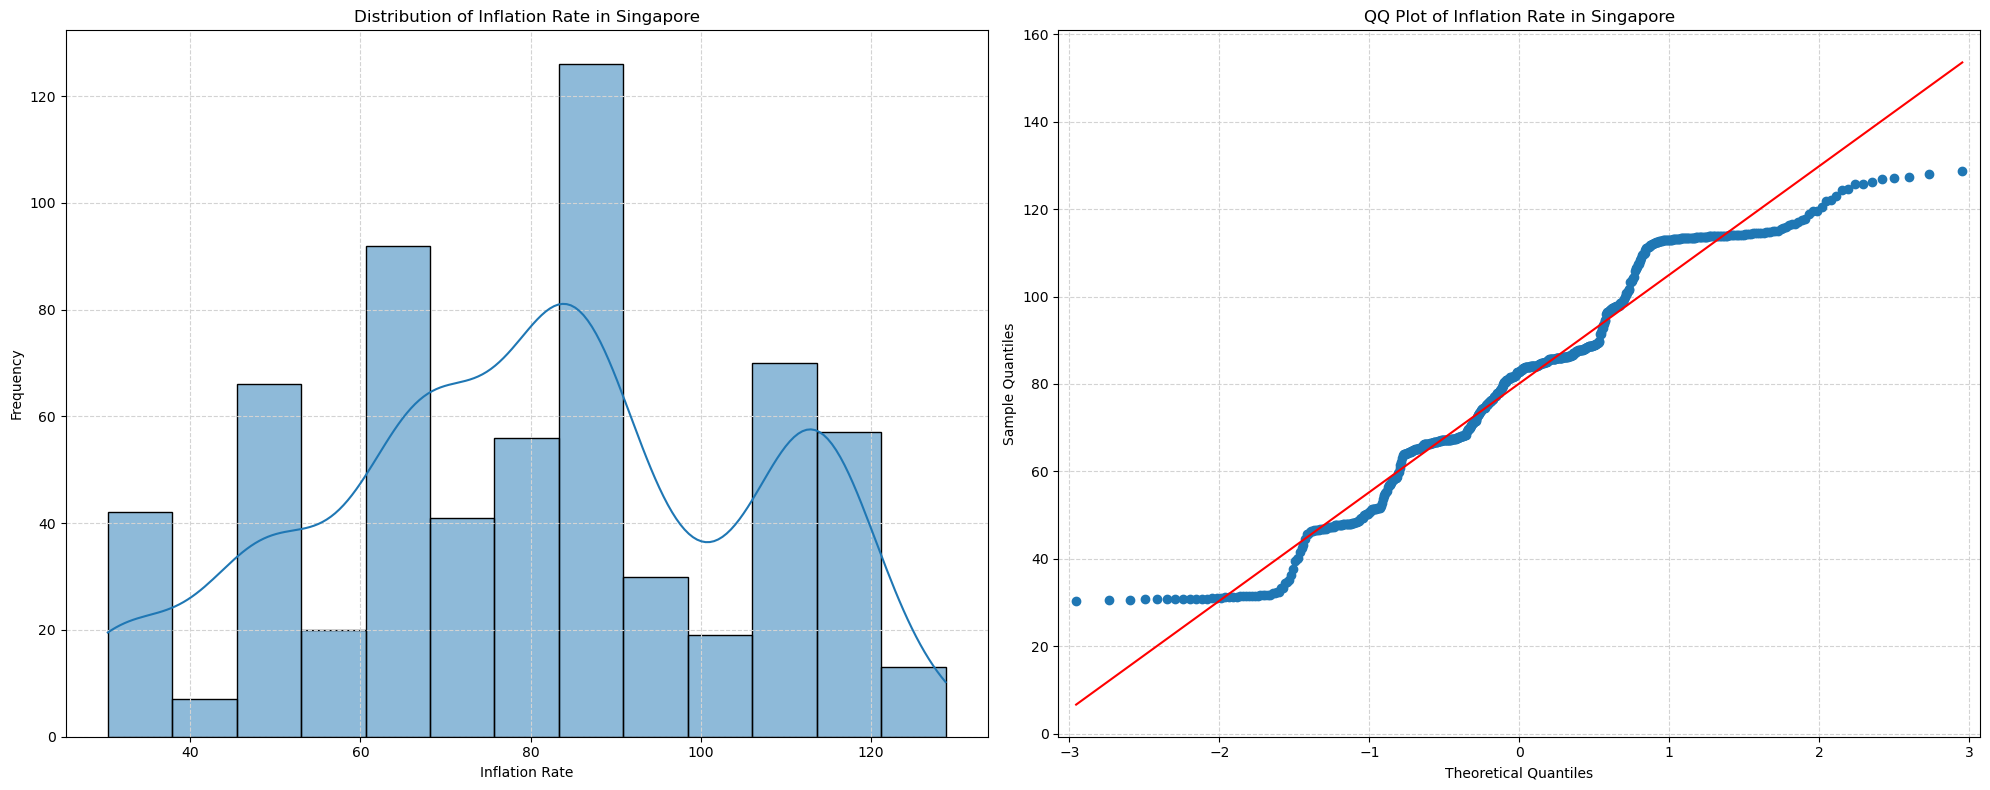

In [1622]:
# fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,8))
# sns.histplot(df_world_infaltion_dataset.Singapore,kde=True, ax=ax1)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plotting histogram
sns.histplot(df_world_infaltion_dataset.Singapore, kde=True, ax=ax1)
ax1.set_xlabel('Inflation Rate')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Inflation Rate in Singapore')
ax1.grid(color='lightgray', linestyle='--')

# Plotting QQ plot
sm.qqplot(df_world_infaltion_dataset.Singapore, line='s', ax=ax2)
ax2.set_title('QQ Plot of Inflation Rate in Singapore')
ax2.grid(color='lightgray', linestyle='--')

# Adjusting spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

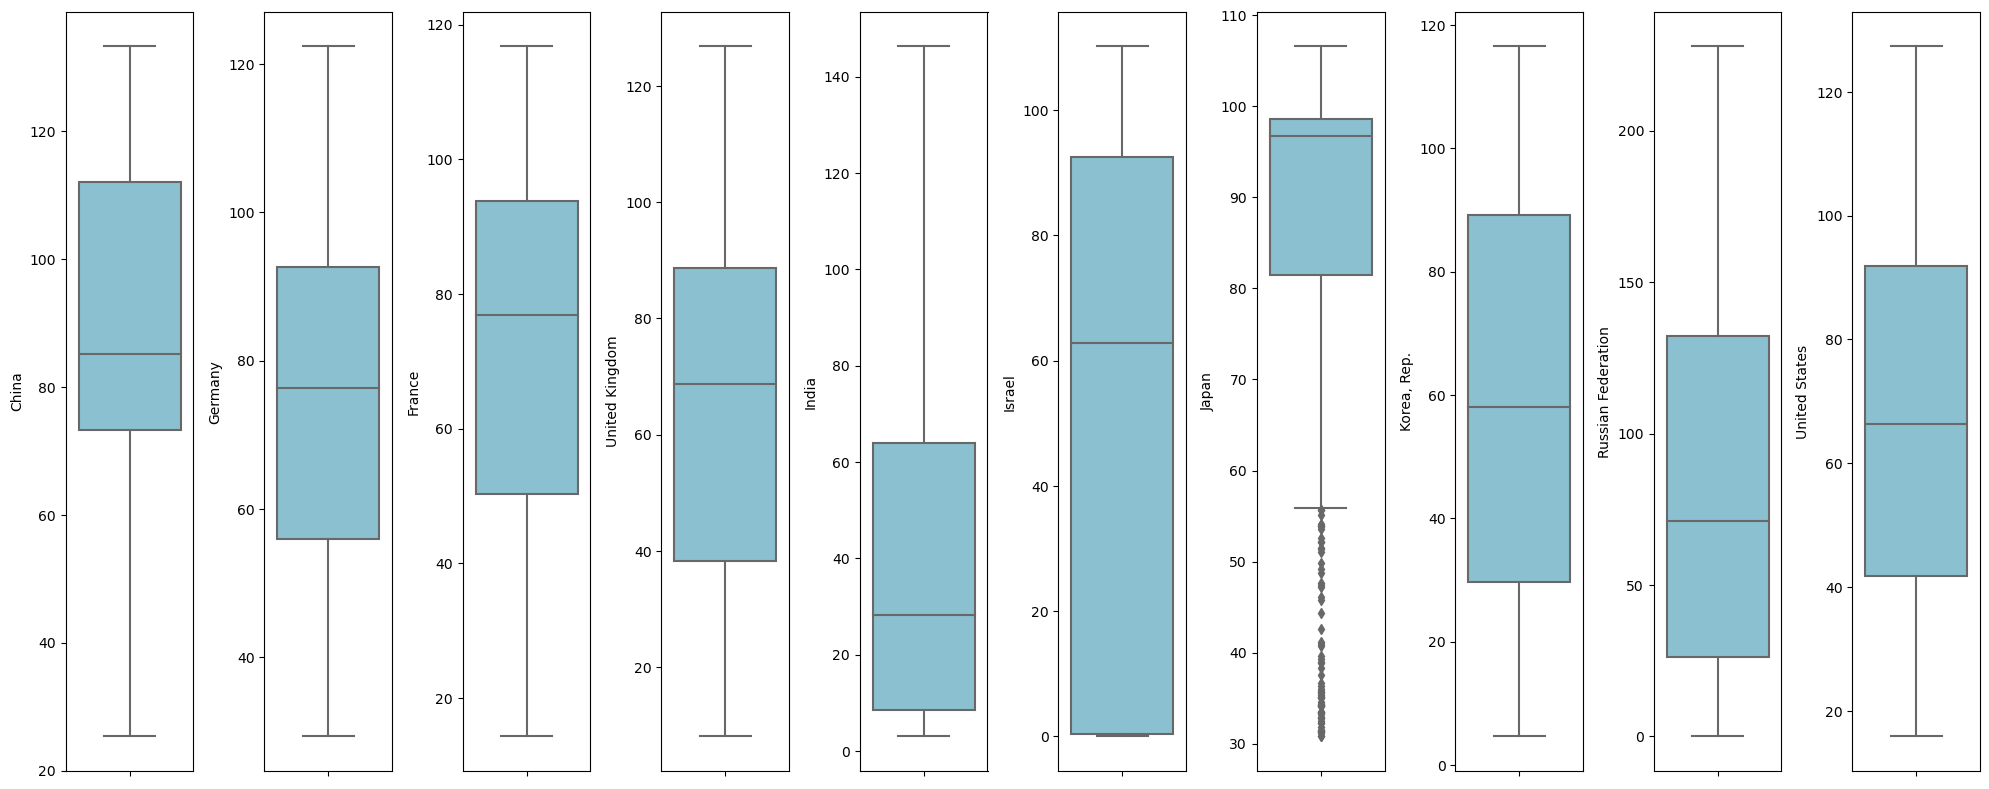

In [1623]:
# Check for outliers 
fig, axMany = plt.subplots(1,10, figsize=(20,8))
colCnt = 0;
cols = df_world_infaltion_dataset.drop(columns=['Singapore'])

for item in cols.columns :
    sns.boxplot(y=cols[item] ,color='#7FC7DB', ax=axMany[colCnt])
    colCnt = colCnt + 1

plt.tight_layout()
plt.show()

In [1624]:
Filtered_Intrest_Rates = df_world_infaltion_dataset.copy()
Filtered_Intrest_Rates = Filtered_Intrest_Rates[Filtered_Intrest_Rates.index > 201112]
Filtered_Intrest_Rates = Filtered_Intrest_Rates[Filtered_Intrest_Rates.index < 202301]

In [1625]:
Filtered_Intrest_Rates.index = pd.to_datetime(Filtered_Intrest_Rates.index, format='%Y%m')
# Now set the converted column as the index
Filtered_Intrest_Rates.set_index(Filtered_Intrest_Rates.index, inplace=True)

In [1626]:
Filtered_Intrest_Rates[['China']]

Country,China
2012-01-01,108.348054
2012-02-01,108.247924
2012-03-01,108.448197
2012-04-01,108.348054
2012-05-01,108.047651
...,...
2022-08-01,132.165056
2022-09-01,132.54963
2022-10-01,132.677821
2022-11-01,132.421439


In [1627]:
Filtered_Intrest_Rates

Country,China,Germany,France,United Kingdom,India,Israel,Japan,"Korea, Rep.",Russian Federation,Singapore,United States
2012-01-01,108.348054,95.9042,97.5,94.7,75.7,97.5,96.2,96.185,110.590898,108.397194,95.6
2012-02-01,108.247924,96.5573,97.9,95.2,76.1,97.5,96.4,96.5498,111.000098,108.103171,96.1
2012-03-01,108.448197,97.117,98.7,95.4,76.9,97.8,96.8,96.5772,111.643898,108.922317,96.8
2012-04-01,108.348054,96.9305,98.8,95.9,78.4,98.7,96.9,96.5677,111.989998,109.50693,97.1
2012-05-01,108.047651,96.9305,98.8,95.9,78.8,98.7,96.6,96.7406,112.572298,109.734598,97.0
...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,132.165056,116.709,113.4,121.8,143.4,107.7,104.6,114.505,NaN,125.689629,125.0
2022-09-01,132.54963,118.818,112.7,122.3,144.7,107.9,105.0,114.831,NaN,126.2342,125.2
2022-10-01,132.677821,119.661,113.9,124.3,146.0,108.5,105.6,115.126,NaN,125.72395,125.7
2022-11-01,132.421439,119.872,114.3,124.8,146.0,108.6,105.8,115.01,NaN,126.943516,125.6


In [1628]:
Filtered_Intrest_Rates = Filtered_Intrest_Rates.resample('A').last()

In [1629]:
Filtered_Intrest_Rates.index

DatetimeIndex(['2012-12-31', '2013-12-31', '2014-12-31', '2015-12-31',
               '2016-12-31', '2017-12-31', '2018-12-31', '2019-12-31',
               '2020-12-31', '2021-12-31', '2022-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

Text(0.5, 1.0, 'Average Intrest For Countries Over the Years')

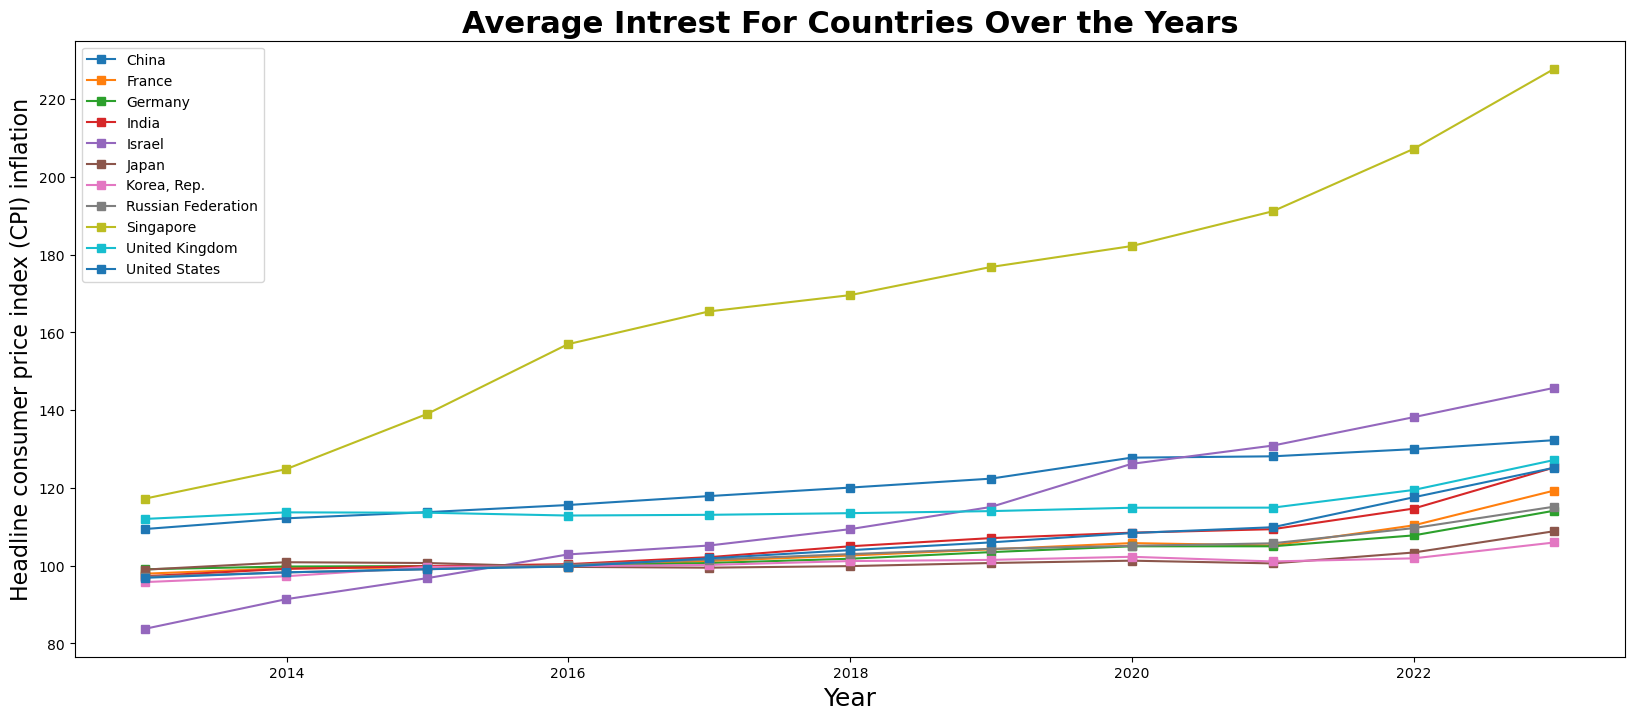

In [1630]:
plt.figure(figsize=(20,8))

for column in Filtered_Intrest_Rates.columns:
    plt.plot(Filtered_Intrest_Rates.index,Filtered_Intrest_Rates[column],marker='s')

plt.legend(np.unique(Filtered_Intrest_Rates.columns),fancybox=True)

plt.xlabel('Year',fontsize=18)
plt.ylabel('Headline consumer price index (CPI) inflation',fontsize=16)
plt.title('Average Intrest For Countries Over the Years',fontsize=22,fontweight='bold')

In [1631]:
Filtered_Intrest_Rates.columns = Filtered_Intrest_Rates.columns.str.replace(' ', '_')
Filtered_Intrest_Rates.columns = Filtered_Intrest_Rates.columns.str.replace('.', '')
Filtered_Intrest_Rates.columns = Filtered_Intrest_Rates.columns.str.replace(',', '')
Filtered_Intrest_Rates = Filtered_Intrest_Rates.astype(float)

In [1632]:
Filtered_Intrest_Rates.index

DatetimeIndex(['2012-12-31', '2013-12-31', '2014-12-31', '2015-12-31',
               '2016-12-31', '2017-12-31', '2018-12-31', '2019-12-31',
               '2020-12-31', '2021-12-31', '2022-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [1633]:
Filtered_Intrest_Rates.index = pd.to_datetime(Filtered_Intrest_Rates.index)
# Extract the year and set it as the new index
Filtered_Intrest_Rates.index = Filtered_Intrest_Rates.index.year
Filtered_Intrest_Rates.index = Filtered_Intrest_Rates.index.astype(float)

In [1634]:
df_merged = df_merged.set_index('year')
df_merged = df_merged.drop(columns='Singapore')

In [1635]:
df_merged_Intrest_Employment_GDP = pd.concat([df_merged, Filtered_Intrest_Rates], axis=1)
df_merged_Intrest_Employment_GDP

,Total_Overall,Africa_,Middle_East_,SS_Africa,Western_Hemisphere_,World,China,Germany,France,United_Kingdom,India,Israel,Japan,Korea_Rep,Russian_Federation,Singapore,United_States
2012.0,64.1,6.2,3.4,3.9,2.5,3.5,109.447934,97.9567,99.10,97.3,83.800,99.000,95.800,97.1686,117.276598,112.044450,96.900
2013.0,64.1,3.7,2.9,4.8,2.2,3.4,112.191353,99.3560,99.80,99.2,91.400,100.900,97.300,98.2797,124.841098,113.723927,98.300
2014.0,64.5,3.7,3.7,4.9,2.0,3.5,113.772911,99.5426,99.90,99.9,96.800,100.700,99.700,99.0988,139.025998,113.636979,99.100
2015.0,65.7,3.4,2.5,3.3,1.8,3.4,115.611659,99.7166,100.00,100.4,102.900,99.700,99.900,100.2200,156.971697,112.910502,99.800
2016.0,65.3,2.2,5.4,1.7,0.8,3.2,117.910100,101.2170,100.70,102.2,105.200,99.500,100.200,101.5610,165.409197,113.094696,101.900
2017.0,64.9,3.8,0.6,2.9,2.0,3.8,120.093618,102.6170,101.80,105.0,109.400,99.900,101.200,102.9910,169.582597,113.519141,104.000
2018.0,65.1,3.4,1.5,3.0,2.4,3.6,122.392059,104.2170,103.50,107.1,115.100,100.700,101.500,104.3510,176.821997,114.046552,106.000
2019.0,65.2,3.0,0.4,3.0,1.6,2.8,127.793405,105.8180,105.00,108.5,126.200,101.300,102.300,105.1210,182.208397,114.914892,108.400
2020.0,64.5,-1.7,-3.4,-1.7,-4.1,-2.8,128.138176,105.2170,105.00,109.4,130.900,100.600,101.100,105.7650,191.159297,114.942349,109.900
2021.0,67.2,4.8,3.9,4.5,6.3,6.3,129.985807,110.3830,107.80,114.7,138.200,103.400,101.900,109.6760,207.203297,119.484259,117.600


Min Max Scaler to scale down data points so outliers wont affect end results. (If needed)

In [1636]:
# normalized_df=(df_merged_Intrest_Employment_GDP-df_merged_Intrest_Employment_GDP.min())/(df_merged_Intrest_Employment_GDP.max()-df_merged_Intrest_Employment_GDP.min())
# normalized_df

If two or more independent variables have an exact linear relationship between them then we have perfect multicollinearity.


In [1637]:
Employment_Rate_Against_Infaltion_in_top_10_Countries = smf.ols("Total_Overall ~ Africa_ + Middle_East_ + SS_Africa + Western_Hemisphere_ + World + China + Germany + France + United_Kingdom + India + Israel + Japan + Korea_Rep + Russian_Federation + Singapore + United_States", data=df_merged_Intrest_Employment_GDP).fit()
Employment_Rate_Against_Infaltion_in_top_10_Countries.summary()

c:\Users\user\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
c:\Users\user\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1794: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
c:\Users\user\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1794: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
c:\Users\user\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Total_Overall   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 05 Feb 2024   Prob (F-statistic):                nan
Time:                        23:50:27   Log-Likelihood:                 279.43
No. Observations:                  11   AIC:                            -536.9
Df Residuals:                       0   BIC:                            -532.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.0105        inf          0        nan         nan         nan
Africa_                 0.1950        inf          0        nan         nan         nan
Middle_East_           -0.0547        inf         -0        nan         nan         nan
SS_Africa              -0.3418        inf         -0        nan         nan         nan
Western_Hemisphere_     0.2762        inf          0        nan         nan         nan
World                   0.0034        inf          0        nan         nan         nan
China                   0.0610        inf          0        nan         nan         nan
Germany                -0.1488        inf         -0        nan         nan         nan
France                  0.3922        inf          0        nan         nan         nan
United_Kingdom         -0.6524        inf         -0        nan         nan         nan
India                  -0.0253        inf         -0        nan         nan         nan
Israel                  0.3704        inf          0        nan         nan         nan
Japan                  -0.0867        inf         -0        nan         nan         nan
Korea_Rep               0.2572        inf          0        nan         nan         nan
Russian_Federation      0.0875        inf          0        nan         nan         nan
Singapore               0.4330        inf          0        nan         nan         nan
United_States          -0.1426        inf         -0        nan         nan         nan
==============================================================================
Omnibus:                        7.872   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                3.273
Skew:                           1.068   Prob(JB):                        0.195
Kurtosis:                       4.606   Cond. No.                     2.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The input rank is higher than the number of observations.
[3] The condition number is large, 2.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R-Value: 1.00, Showing High Positive Correlation


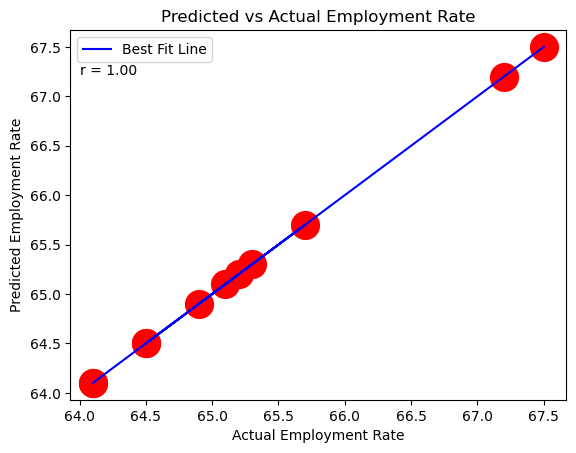

In [1638]:
# Get the predicted values
predicted_values = Employment_Rate_Against_Infaltion_in_top_10_Countries.predict()

# # Calculate the line of best fit
slope, intercept, r_value, p_value, std_err = linregress(df_merged_Intrest_Employment_GDP['Total_Overall'], predicted_values)
line_of_best_fit = slope * df_merged_Intrest_Employment_GDP['Total_Overall'] + intercept

# Plot the scatter plot
plt.scatter(df_merged_Intrest_Employment_GDP['Total_Overall'], predicted_values,s=400,color='red')
plt.plot(df_merged_Intrest_Employment_GDP['Total_Overall'], line_of_best_fit, color='blue', label='Best Fit Line')
plt.xlabel('Actual Employment Rate')
plt.ylabel('Predicted Employment Rate')
plt.title('Predicted vs Actual Employment Rate')
plt.legend()

# Add the r value as a label
plt.text(0.02, 0.88, f'r = {r_value:.2f}', transform=plt.gca().transAxes)

print(f'R-Value: {r_value:.2f}, Showing High Positive Correlation')

# Plot figure
plt.show()

<h2>Dataset 4 (NUS Employment Dataset)</h2>

In [1639]:
df_UNI_Graduates

,year,university,school,degree,employment_rate_overall,employment_rate_ft_perm,basic_monthly_mean,basic_monthly_median,gross_monthly_mean,gross_monthly_median,gross_mthly_25_percentile,gross_mthly_75_percentile
0,2013,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy and Business,97.4,96.1,3701,3200,3727,3350,2900,4000
1,2013,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy (3-yr direct Honours Programme),97.1,95.7,2850,2700,2938,2700,2700,2900
2,2013,Nanyang Technological University,College of Business (Nanyang Business School),Business (3-yr direct Honours Programme),90.9,85.7,3053,3000,3214,3000,2700,3500
3,2013,Nanyang Technological University,College of Business (Nanyang Business School),Business and Computing,87.5,87.5,3557,3400,3615,3400,3000,4100
4,2013,Nanyang Technological University,College of Engineering,Aerospace Engineering,95.3,95.3,3494,3500,3536,3500,3100,3816
...,...,...,...,...,...,...,...,...,...,...,...,...
1116,2021,Singapore University of Social Sciences,School of Business,Bachelor of Science in Supply Chain Management,97.4,79.5,3245,3200,3381,3300,3025,3500
1117,2021,Singapore University of Technology and Design,na,Bachelor of Engineering (Computer Science and ...,98.3,96.7,4936,4800,5030,4800,4400,5414
1118,2021,Singapore University of Technology and Design,na,Bachelor of Engineering (Engineering Product D...,89.9,85.5,4047,4000,4141,4000,3750,4500
1119,2021,Singapore University of Technology and Design,na,Bachelor of Engineering (Engineering Systems a...,95.5,90.9,4542,4500,4778,4700,3900,5000


In [1640]:
df_UNI_Graduates = df_UNI_Graduates[df_UNI_Graduates['university'].isin(['National University of Singapore','Nanyang Technological University','Singapore University of Technology and Design'])]
df_UNI_Graduates = df_UNI_Graduates[df_UNI_Graduates['degree'].isin(['Bachelor of Engineering (Information Systems Technology and Design)','Bachelor of Engineering (Computer Science and Design)','Computer Science','Information Systems','Computer Engineering','Mathematics & Computer Science','Bachelor of Computing (Computer Science)','Bachelor of Computing (Information Systems)'])]

In [1641]:
df_UNI_Graduates.reset_index(inplace=True)

In [1642]:
nus_grads = df_UNI_Graduates[df_UNI_Graduates['university'] == 'National University of Singapore']
ntu_grads = df_UNI_Graduates[df_UNI_Graduates['university'] == 'Nanyang Technological University']
sutd_grads = df_UNI_Graduates[df_UNI_Graduates['university'] == 'Singapore University of Technology and Design']

In [1643]:
arr = [nus_grads,ntu_grads,sutd_grads]
for each in arr:
    each.reset_index()
    each.drop(columns=['index','university','basic_monthly_mean',	'basic_monthly_median',	'gross_monthly_mean',	'gross_monthly_median',	'gross_mthly_25_percentile','gross_mthly_75_percentile'], inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_15664\3416161276.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  each.drop(columns=['index','university','basic_monthly_mean',	'basic_monthly_median',	'gross_monthly_mean',	'gross_monthly_median',	'gross_mthly_25_percentile','gross_mthly_75_percentile'], inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_15664\3416161276.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  each.drop(columns=['index','university','basic_monthly_mean',	'basic_monthly_median',	'gross_monthly_mean',	'gross_monthly_median',	'gross_mthly_25_percentile','gross_mthly_75_percentile'], inplace=

In [1644]:
nus_grads

,year,school,degree,employment_rate_overall,employment_rate_ft_perm
2,2013,School of Computing,Bachelor of Computing (Computer Science),92.4,83.3
3,2013,School of Computing,Bachelor of Computing (Information Systems),89.2,83.9
6,2014,School of Computing,Bachelor of Computing (Computer Science),90.6,85.9
7,2014,School of Computing,Bachelor of Computing (Information Systems),95.5,92
10,2015,School of Computing,Bachelor of Computing (Computer Science),97,95
11,2015,School of Computing,Bachelor of Computing (Information Systems),97.2,97.2
15,2016,School of Computing,Bachelor of Computing (Computer Science),96.3,93.3
16,2016,School of Computing,Bachelor of Computing (Information Systems),94,94
18,2017,School of Computing,Bachelor of Computing (Computer Science),93.5,89.4
19,2017,School of Computing,Bachelor of Computing (Information Systems),94.5,91.8


In [1645]:
ntu_grads

,year,school,degree,employment_rate_overall,employment_rate_ft_perm
0,2013,College of Engineering,Computer Engineering,90.3,88.2
1,2013,College of Engineering,Computer Science,92.1,88.5
4,2014,College of Engineering,Computer Engineering,91.4,88.8
5,2014,College of Engineering,Computer Science,94.5,93.7
8,2015,College of Engineering,Computer Engineering,85.1,83
9,2015,College of Engineering,Computer Science,92.4,91.4
13,2016,College of Engineering,Computer Engineering,83.3,75.9
14,2016,College of Engineering,Computer Science,94.6,91.4
21,2018,College of Engineering,Computer Engineering,95.8,95.8
22,2018,College of Engineering,Computer Science,94.4,93


In [1646]:
sutd_grads = sutd_grads[sutd_grads['year'] < 2021]

In [1647]:
sutd_grads = sutd_grads.drop(columns=['school','degree'])

In [1648]:
sutd_grads = sutd_grads.set_index('year')

In [1649]:
sutd_grads.astype(float)

,employment_rate_overall,employment_rate_ft_perm
year,,
2015,86.0,83.7
2016,91.9,91.9
2017,100.0,100.0
2018,97.3,93.3
2019,88.8,85.7
2020,96.9,85.4


In [1650]:
sutd_grads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 2015 to 2020
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   employment_rate_overall  6 non-null      object
 1   employment_rate_ft_perm  6 non-null      object
dtypes: object(2)
memory usage: 144.0+ bytes


In [1651]:
sutd_grads

,employment_rate_overall,employment_rate_ft_perm
year,,
2015,86,83.7
2016,91.9,91.9
2017,100,100
2018,97.3,93.3
2019,88.8,85.7
2020,96.9,85.4


In [1652]:
Final_Dataset = pd.concat([sutd_grads, df_merged_Intrest_Employment_GDP], axis=1)
Final_Dataset = Final_Dataset.astype(float)

In [1653]:
sutd_employment_overall_vs_external_factors = smf.ols("employment_rate_overall ~ China + India + Japan + World", data=Final_Dataset).fit()
sutd_employment_overall_vs_external_factors.summary()

c:\Users\user\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     employment_rate_overall   R-squared:                       0.882
Model:                                 OLS   Adj. R-squared:                  0.408
Method:                      Least Squares   F-statistic:                     1.861
Date:                     Mon, 05 Feb 2024   Prob (F-statistic):              0.496
Time:                             23:50:27   Log-Likelihood:                -11.753
No. Observations:                        6   AIC:                             33.51
Df Residuals:                            1   BIC:                             32.47
Df Model:                                4                                         
Covariance Type:                 nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2568.9146   1087.121     -2.363      0.255   -1.64e+04    1.12e+04
China          0.6357      5.376      0.118      0.925     -67.669      68.940
India         -3.5288      2.261     -1.560      0.363     -32.263      25.206
Japan         29.8403     14.173      2.105      0.282    -150.245     209.926
World        -10.4519      4.116     -2.539      0.239     -62.755      41.851
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   3.315
Prob(Omnibus):                    nan   Jarque-Bera (JB):                1.065
Skew:                           1.028   Prob(JB):                        0.587
Kurtosis:                       2.823   Cond. No.                     1.24e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<H1>Conclusion</H1>
In conclusion i can see that GDP and Infaltion Rates worldwide Affect singapores employment rate drastically, showing that singapore is heavily infulenced by external facotrs not limited to the ones i have displayed but can be in relation or caused to affect GDP and Inflation.